In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import pandas as pd

sns.set_theme()

In [37]:
df = pd.read_csv("data\Scrapping_03-12-23_12-10-44.csv", na_values="--" ,sep=",")
# df["opoznienie"] = df['opoznienie'].replace('--',np.nan)

Na których stacjach pojawia się opóźnienie?

In [38]:
df.tail(10)

,nazwa_pociagu,stacja_poczatkowa,stacja_koncowa,stacja_pomiaru,data,czas_rozkladowy,czas_przyjazdu,opoznienie
92538,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Ciechanów,24.12,12:25,12:48,23.0
92539,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Nowy Dwór Mazowiecki,24.12,12:56,13:25,29.0
92540,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Legionowo,24.12,13:06,13:38,32.0
92541,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Warszawa Wschodnia,24.12,13:21,13:55,34.0
92542,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Warszawa Centralna,24.12,13:30,14:04,34.0
92543,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Warszawa Zachodnia,24.12,14:00,14:26,26.0
92544,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Opoczno Południe,24.12,15:08,15:49,41.0
92545,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Włoszczowa Północ,24.12,15:41,16:28,47.0
92546,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Miechów,24.12,16:18,16:58,40.0
92547,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Kraków Główny,24.12,16:50,17:29,39.0


In [39]:
len(df['stacja_pomiaru'].unique()) # pomiary na 465 stacjach


465

In [40]:
df2 = df[["stacja_pomiaru", "opoznienie"]]
# df2["opoznienie"] = df2['opoznienie'].replace('--',np.nan)
df2["opoznienie"] = pd.to_numeric(df2["opoznienie"])
# df2.info()

C:\Users\THINK\AppData\Local\Temp\ipykernel_9944\426336077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["opoznienie"] = pd.to_numeric(df2["opoznienie"])


In [41]:
sum_delay = df2.groupby(["stacja_pomiaru"]).sum()

In [42]:
sum_delay #łączne opóźnienie na poszczególnych stacjach w przeciągu 3 msc
# df2

,opoznienie
stacja_pomiaru,
Aleksandrów Kujawski,1464.0
Augustów,212.0
Babiak,94.0
Babimost,50.0
Baciuty,220.0
...,...
Żegiestów-Zdrój,172.0
Żmigród,1664.0
Żory,468.0


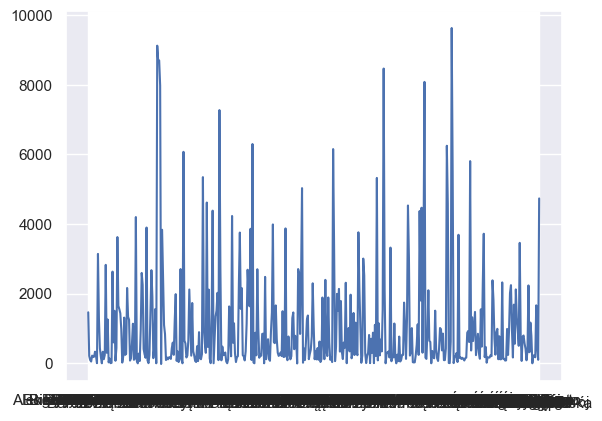

In [43]:
plt.plot(sum_delay) # bez sensu XDD

opóźnienie na końcowej stacji, z jakim opóźnieniem przyjechał do celu? 
- rozdzielić nazwy pociągu
- przefiltrować, zostawić wiersze z pomiarem końcowej stacji
- wyjdą opóźnienia każdego przejazdu

policzyć średnie opóźnienia dla poszczególnych nazw pociągu (np SILESIA)
- policzyć średnią opóźnień poszczególnych pociągów
- wyplotować nazwy tych pociągów i średnie opóźnienie (porównanie tras)

In [44]:
# len(df["nazwa_pociagu"].unique()) #423 pociągi/ przejzadów
# df["nazwa_pociagu"].unique()


df3 = df[df["stacja_koncowa"] == df["stacja_pomiaru"]] # same pomiary z przyjazdu na końcową stacje

# df3["opoznienie"] = pd.to_numeric(df3["opoznienie"])
# df3[['kod_pociagu', 'id_pociagu','nazwa']] = df["nazwa_pociagu"].apply(lambda x: pd.Series(str(x).split(" ")))

t = df3[["nazwa_pociagu","opoznienie"]].groupby(['nazwa_pociagu']).mean() #chuj nie wiem xdddd

t

,opoznienie
nazwa_pociagu,
ECE 14000/1 SILESIA,1.833333
ECE 14002/3 POLONIA,3.916667
ECE 14004/5 BATORY,5.333333
ECE 14006/7 SILESIA,6.916667
ECE 14008/9 SILESIA,1.500000
...,...
MPS 60151 ŚNIEŻKA,7.500000
MPS 66150 ŚNIEŻKA,3.166667
MPS 80104 ZAMOYSKI,0.500000


In [45]:
# w zależności od pociągu
mean_delay_train = {x: np.mean(df[df['nazwa_pociagu']==x]['opoznienie']) for x in set(df['nazwa_pociagu'])}

In [46]:
mean_delay_train #423 pociągi

{'EIE 5110/1 SŁOWINIEC': 7.788888888888889,
 'MPE 45150/1 HALNY': 7.650190114068441,
 'MPE 38152/3 LUBOMIRSKI': 17.811728395061728,
 'MPE 17104/5 WARTA': -0.19166666666666668,
 'EIJ 1502/3': 11.408333333333333,
 'MPS 85110/1 BORY TUCHOLSKIE': 4.933333333333334,
 'EIJ 5404/5': 1.0049019607843137,
 'EIJ 1306/7': 3.4791666666666665,
 'EIJ 6123/2 BACZYŃSKI': 2.162037037037037,
 'MPE 57102/3 DRWĘCA': 1.1369047619047619,
 'MPE 58108/9 STAŃCZYK': 13.496794871794872,
 'MPM 33112/3 BIESZCZADY': 0.6666666666666666,
 'MPS 10110/1 ŻUBR': 1.4102564102564104,
 'EIJ 3722/3 BARBAKAN': 2.004385964912281,
 'EIJ 5310/1': 2.574074074074074,
 'EIJ 4506/7': 9.05232558139535,
 'MME 12010/1 KIEV EXPRESS': 12.488095238095237,
 'EIJ 1302/3': -0.08333333333333333,
 'EIJ 1524/5 KOPERNIK': 6.771084337349397,
 'MPE 86104 SWAROŻYC': 10.827380952380953,
 'EIE 7201/0 HETMAN': 5.642857142857143,
 'MPE 81106/7 MEWA': 8.641509433962264,
 'EIE 3804/5 MATEJKO': 3.3468992248062017,
 'MPE 21110/1 NIDA': 2.0833333333333335,
 

In [47]:
# mean_delay = {x: np.mean(df[df["stacja_pomiaru"] == x]["opoznienie"]) for x in set(df["stacja_pomiaru"])}
set(df['nazwa_pociagu'])

{'ECE 14000/1 SILESIA',
 'ECE 14002/3 POLONIA',
 'ECE 14004/5 BATORY',
 'ECE 14006/7 SILESIA',
 'ECE 14008/9 SILESIA',
 'ECE 17000/1 BERLIN-WARSZAWA-EXPR',
 'ECE 17002/3 BERLIN-WARSZAWA-EXPR',
 'ECE 17004/5 BERLIN-WARSZAWA-EXPR',
 'ECE 17008/9 BERLIN-WARSZAWA-EXPR',
 'ECE 17010/1 BERLIN-WARSZAWA-EXPR',
 'ECE 37000/1 WAWEL',
 'ECE 40001 MORAVIA',
 'ECE 41000/1 SILESIA',
 'ECE 41002/3 POLONIA',
 'ECE 41004/5 BATORY',
 'ECE 41006/7 SILESIA',
 'ECE 41008/9 SILESIA',
 'ECE 44000 MORAVIA',
 'ECE 45000/1 SOBIESKI',
 'ECE 54000/1 SOBIESKI',
 'ECE 57000/1 GEDANIA',
 'ECE 71000/1 BERLIN-WARSZAWA-EXPR',
 'ECE 71002/3 BERLIN-WARSZAWA-EXPR',
 'ECE 71004/5 BERLIN-WARSZAWA-EXPR',
 'ECE 71008/9 BERLIN-WARSZAWA-EXPR',
 'ECE 71010/1 BERLIN-WARSZAWA-EXPR',
 'ECE 73000/1 WAWEL',
 'ECE 75000/1 GEDANIA',
 'EIE 1350/1 TATRY',
 'EIE 1410/1 ONDRASZEK',
 'EIE 1510/1 SŁOWINIEC',
 'EIE 1512/3 WYBRZEŻE',
 'EIE 1532/3 KOCIEWIE',
 'EIE 1600/1 PANORAMA',
 'EIE 1628/9 OLEŃKA',
 'EIE 1650/1 ŚNIEŻKA',
 'EIE 1800/1 CHROB

In [50]:
df3["nazwa_pociagu"] = df3["nazwa_pociagu"].str.split().apply(lambda x: " ".join(x[2:]))

C:\Users\THINK\AppData\Local\Temp\ipykernel_9944\1231967345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["nazwa_pociagu"] = df3["nazwa_pociagu"].str.split().apply(lambda x: " ".join(x[2:]))


In [56]:
pociagi = df3.groupby("nazwa_pociagu").mean().reset_index().sort_values(by="opoznienie")

C:\Users\THINK\AppData\Local\Temp\ipykernel_9944\754589302.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pociagi = df3.groupby("nazwa_pociagu").mean().reset_index().sort_values(by="opoznienie")


In [57]:
pociagi

,nazwa_pociagu,opoznienie
71,MARSZAŁEK PIŁSUDSKI,-2.083333
70,MAMRY,-0.625000
122,STARZYŃSKI,0.000000
85,NIEGOCIN,0.041667
48,JAGIEŁŁO,0.125000
...,...,...
18,BRYZA,18.125000
124,STAŃCZYK,19.361111
66,LUBOMIRSKI,21.687500
89,OLEŃKA,22.333333


[]

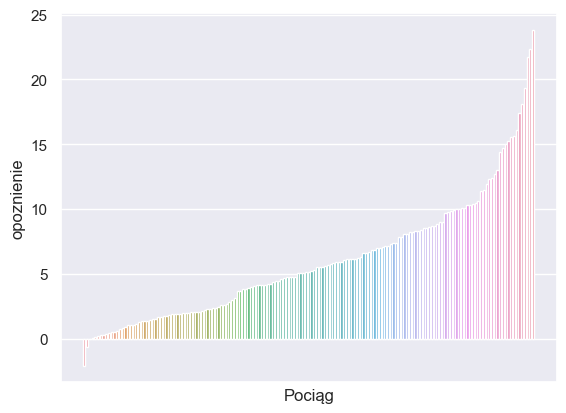

In [58]:
sns.barplot(x="nazwa_pociagu", y="opoznienie", data=pociagi)
plt.xticks([])
plt.xlabel("Pociąg")
plt.plot()